# Demonstration: VQE algorithm

In [1]:
from PhaseEstimation import vqe, hamiltonians, ising_chain, annni_model
from PhaseEstimation import visualization as qplt

In [2]:
# System parameters
N = 8
J = 1
n_states = 10

# Learning parameters
lr = .3

### Ising Chain
$$H = - h \Sigma_i \sigma_z^i - J \Sigma_i \sigma_x^i\sigma_x^{i+1}\qquad\left[J\equiv 1, h \in [0,2*J]\right]$$

In [3]:
# Initialize Hamiltonian class with the desired parameters
# N = number of spins
# J = interaction strenght
# n_states : number of possible different states for h in [0,2*J]
# ring     : if True -> periodic boundary conditions
Hs = hamiltonians.hamiltonian(ising_chain.build_Hs, N = N, J = J, n_states = n_states, ring = False)

In [4]:
# Initialize VQE class
myvqe = vqe.vqe(Hs, vqe.circuit_ising)

In [5]:
# Train VQE
myvqe.train(lr = .1, n_epochs = 100, circuit = True)

# Train only VQE points which accuracy is higher than a certain threshold (third parameter)
myvqe.train_refine(lr = .1, n_epochs = 1000, acc_thr = 0.01, assist = False)

+--- CIRCUIT ---+
0: ──||──H─╭C──RY(0.00)──────────────────────────────────────────────────────────────||──H─╭C
1: ──||──H─╰X─╭C─────────RY(1.00)────────────────────────────────────────────────────||──H─╰X
2: ──||──H────╰X────────╭C─────────RY(2.00)──────────────────────────────────────────||──H───
3: ──||──H──────────────╰X────────╭C─────────RY(3.00)────────────────────────────────||──H───
4: ──||──H────────────────────────╰X────────╭C─────────RY(4.00)──────────────────────||──H───
5: ──||──H──────────────────────────────────╰X────────╭C─────────RY(5.00)────────────||──H───
6: ──||──H────────────────────────────────────────────╰X────────╭C─────────RY(6.00)──||──H───
7: ──||──H──────────────────────────────────────────────────────╰X─────────RY(7.00)──||──H───

───RY(8.00)───────────────────────────────────────────────────────────────────||──H─╭C──RY(16.00)
──╭C─────────RY(9.00)─────────────────────────────────────────────────────────||──H─╰X─╭C────────
──╰X────────╭C─────────RY(10.00)─

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

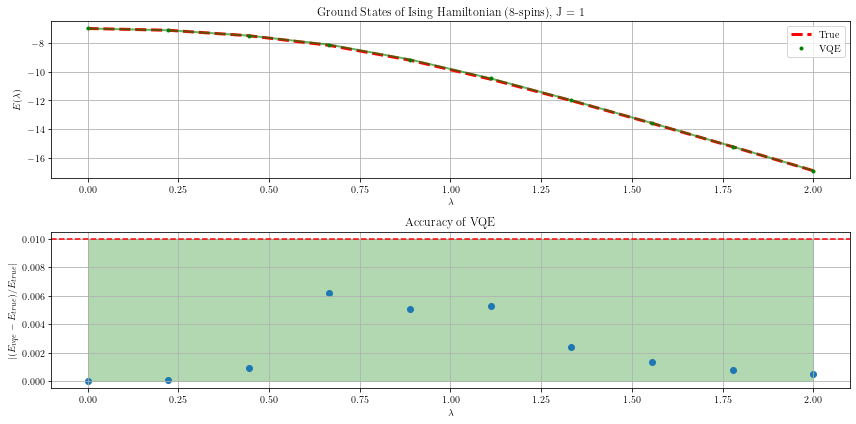

In [6]:
qplt.show_VQE_isingchain(myvqe)

In [7]:
# Train VQE
myvqe.train_excited(lr = .1, n_epochs = 100, beta = 5, circuit = False)

# Train only VQE points which accuracy is higher than a certain threshold (third parameter)
myvqe.train_refine_excited(lr = .1, n_epochs = 1000, acc_thr = 0.01, beta = 5, assist = False)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

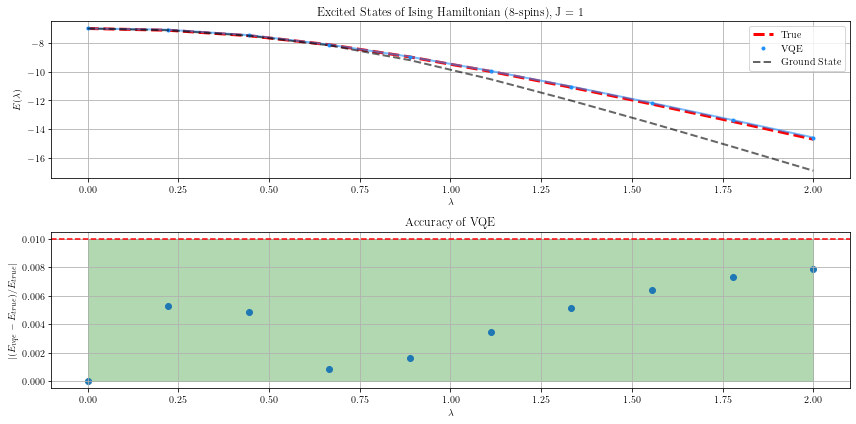

In [8]:
qplt.show_VQE_isingchain(myvqe, excited = True)

### ANNNI Model
$$H = - J_1\left( L \Sigma_i \sigma_z^i + \Sigma_i \sigma_x^i\sigma_x^{i+1} + K \Sigma_i \sigma_x^i\sigma_x^{i+2} \right) \qquad\left[{J_1}\equiv 1, L:=\frac{h}{J_1}, K:= \frac{J_2}{J_1}, L\in[0,2], K = [0, -J1]\right]$$

In [9]:
# Initialize ANNNI Hamiltonian class with the desired parameters
# N = number of spins
# n_states : number of possible values each hyperparameter can have
# ring     : if True -> periodic boundary conditions
Hs = hamiltonians.hamiltonian(annni_model.build_Hs, N = N, n_states = 10, ring = False)

In [10]:
# Initialize VQE class
myvqe = vqe.vqe(Hs, vqe.circuit_ising)

In [11]:
# Train VQE
myvqe.train(lr = .1, n_epochs = 100, circuit = False)

# Train only VQE points which accuracy is higher than a certain threshold (third parameter)
myvqe.train_refine(lr = .1, n_epochs = 1000, acc_thr = 0.01, assist = True)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

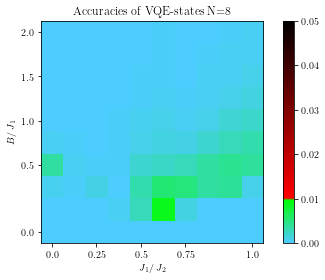

In [12]:
qplt.show_VQE_annni(myvqe)